# تحليل بيانات المعلمين في المملكة العربية السعودية

author: Mohammed Mahdi (@muh3ammed)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### قراءة البيانات

In [2]:
df = pd.read_csv('../data/Salary by Education.csv')
df.head()

,Degree Level,Nationality,Gender,Year Quarter,Salary,Currency
0,Primary,NonSaudi,Female,2017 Q1,1590,SAR
1,Primary,NonSaudi,Male,2017 Q1,2173,SAR
2,Primary,Saudi,Female,2017 Q1,4172,SAR
3,Primary,Saudi,Male,2017 Q1,6172,SAR
4,Primary,NonSaudi,Female,2017 Q2,1597,SAR


### حجم البيانات

In [3]:
# Dataset shape (rows: 504, columns: 6)
df.shape

(504, 6)

In [4]:
df.columns

Index(['Degree Level', 'Nationality', 'Gender', 'Year Quarter', 'Salary',
       'Currency'],
      dtype='object')

### التعديل على اسماء الاعمدة

In [5]:
cols = [col.replace(' ','_').lower() for col in df.columns]
cols

['degree_level', 'nationality', 'gender', 'year_quarter', 'salary', 'currency']

In [6]:
df.columns = cols
df.head()

,degree_level,nationality,gender,year_quarter,salary,currency
0,Primary,NonSaudi,Female,2017 Q1,1590,SAR
1,Primary,NonSaudi,Male,2017 Q1,2173,SAR
2,Primary,Saudi,Female,2017 Q1,4172,SAR
3,Primary,Saudi,Male,2017 Q1,6172,SAR
4,Primary,NonSaudi,Female,2017 Q2,1597,SAR


### تقسيم المعلومة الى عمودين لسهل التعامل معها

**'year_quarter'** to **'year'** and **'quarter'**

In [7]:
df['quarter'] = df['year_quarter'].apply(lambda x: x.split()[1])
df.head()

,degree_level,nationality,gender,year_quarter,salary,currency,quarter
0,Primary,NonSaudi,Female,2017 Q1,1590,SAR,Q1
1,Primary,NonSaudi,Male,2017 Q1,2173,SAR,Q1
2,Primary,Saudi,Female,2017 Q1,4172,SAR,Q1
3,Primary,Saudi,Male,2017 Q1,6172,SAR,Q1
4,Primary,NonSaudi,Female,2017 Q2,1597,SAR,Q2


In [8]:
df = df.rename(columns={'year_quarter':'year'})
df['year'] = df['year'].apply(lambda x: x.split()[0])
df.head()

,degree_level,nationality,gender,year,salary,currency,quarter
0,Primary,NonSaudi,Female,2017,1590,SAR,Q1
1,Primary,NonSaudi,Male,2017,2173,SAR,Q1
2,Primary,Saudi,Female,2017,4172,SAR,Q1
3,Primary,Saudi,Male,2017,6172,SAR,Q1
4,Primary,NonSaudi,Female,2017,1597,SAR,Q2


### معلومات بسيطة عن البيانات

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   degree_level  504 non-null    object
 1   nationality   504 non-null    object
 2   gender        504 non-null    object
 3   year          504 non-null    object
 4   salary        504 non-null    int64 
 5   currency      504 non-null    object
 6   quarter       504 non-null    object
dtypes: int64(1), object(6)
memory usage: 27.7+ KB


### وصف المرتبات بشكل عام

mean = 8950

min = 1331

max = 35622 ...

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
salary,504.0,8950.031746,6372.635277,1331.0,4194.0,7890.5,12448.75,35622.0


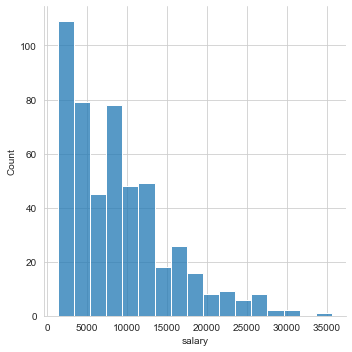

In [18]:
sns.set_style('whitegrid')  
sns.displot(x='salary', data=df);

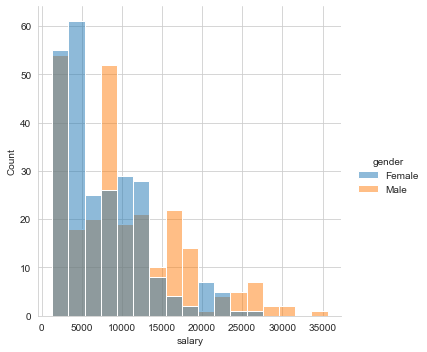

In [23]:
sns.displot(x='salary', hue='gender', data=df);

### ما هي جنسية صاحب اعلى مرتب؟

In [12]:
df[df['salary'] == df['salary'].max()]

,degree_level,nationality,gender,year,salary,currency,quarter
427,Doctorate,Saudi,Male,2021,35622,SAR,Q1


### ماهو معدل المرتبات حسب الدرجة التعليمية؟

In [13]:
df.groupby('degree_level').mean()

,salary
degree_level,
Bachelor,9535.555556
Diploma,7036.694444
Doctorate,19835.458333
Intermediate,4101.527778
Master Degree,13797.875000
Primary,3569.041667
Secondary,4774.069444


### كيف تغيرت المرتبات خلال السنوات الخمس؟

In [14]:
df.groupby(['degree_level' ,'year']).mean()

salary
degree_level  year            
Bachelor      2017   9402.5000
              2018   9634.0000
              2019   9864.5000
              2020   9325.6250
              2021   9366.7500
Diploma       2017   6791.3125
              2018   7092.1250
              2019   7405.3750
              2020   7007.0625
              2021   6738.5000
Doctorate     2017  18590.1875
              2018  18918.0000
              2019  19599.0625
              2020  20205.8750
              2021  23892.8750
Intermediate  2017   3934.2500
              2018   4207.0625
              2019   4194.6250
              2020   4163.6250
              2021   3914.6250
Master Degree 2017  13321.0625
              2018  13388.0625
              2019  14076.8125
              2020  13586.3125
              2021  15436.3750
Primary       2017   3487.3750
              2018   3554.1875
              2019   3734.5000
              2020   3649.2500
              2021   3270.7500
Secondary     2017   4800.3750
              2018   4815.6875
              2019   4923.3750
              2020   4744.1250
              2021   4399.5000

### هل يوجد فرق بين مرتبات الذكور و النساء؟

نلاحظ فرق واضح بين المرتبات

In [15]:
df.groupby(['gender', 'degree_level']).mean()

salary
gender degree_level               
Female Bachelor        8417.750000
       Diploma         6694.055556
       Doctorate      17172.750000
       Intermediate    3161.000000
       Master Degree  11605.166667
       Primary         2929.444444
       Secondary       3671.750000
Male   Bachelor       10653.361111
       Diploma         7379.333333
       Doctorate      22498.166667
       Intermediate    5042.055556
       Master Degree  15990.583333
       Primary         4208.638889
       Secondary       5876.388889

### هل يوجد فرق بين مرتبات الجنسية السعودية و الجنسيات الاخرى؟

علاقة قوية بين المرتب و الجنسية السعودية

In [16]:
df.groupby('nationality').mean()

,salary
nationality,
NonSaudi,6663.587302
Saudi,11236.476190


### هل تم تغيير المرتبات اثناء السنة؟

In [17]:
df.groupby(['year', 'quarter']).mean()

salary
year quarter             
2017 Q1       8777.821429
     Q2       8644.857143
     Q3       8622.250000
     Q4       8427.678571
2018 Q1       8551.678571
     Q2       9013.642857
     Q3       9062.928571
     Q4       8576.964286
2019 Q1       8865.107143
     Q2       9189.892857
     Q3       9106.571429
     Q4       9294.571429
2020 Q1       9443.642857
     Q2       8662.214286
     Q3       8609.214286
     Q4       9103.142857
2021 Q1       9550.607143
     Q2       9597.785714